In [1]:
from src.narou.corpus.narou_corpus import NarouCorpus
from src.narou.corpus.multi_feature_and_bin_classified_sentence_data import MultiFeatureAndBinClassifiedSentenceData

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
supplier = MultiFeatureAndBinClassifiedSentenceData()
corpus = supplier.corpus

loading embedding_model...


In [4]:
raw_data_dict = supplier.multi_feature_and_bin_classified_sentence_data_dict()

loading data dict...


In [29]:
ncodes = list(raw_data_dict.keys())
ncode = ncodes[0]

### 類似度のチャートを確認

In [30]:
def show_per_novel_sim_chart(ncode):
    data = raw_data_dict[ncode]
    sims = data['Y_score']
    x_axis = np.arange(len(sims))
    plt.bar(x_axis, sims, label='cos_sim', linewidth=1)
    plt.title('Cos similarity plot')
    plt.xlabel('sentence index')
    plt.ylabel('similarity')
    plt.ylim(0, 1.0)
    plt.legend()
    plt.show()
    
    print('average: {:.3f}'.format(np.average(sims)))
    print('var: {:.3f}'.format(np.var(sims)))

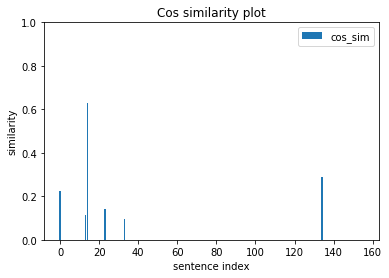

average: 0.010
var: 0.004


In [31]:
show_per_novel_sim_chart(ncode)

### 重要度の分布

In [44]:
hist = np.zeros(9)
for i, ncode in enumerate(ncodes):
    scores = raw_data_dict[ncode]['Y_score']
    bins = np.arange(0, 1, 0.1)
    h, b = np.histogram(scores, bins=bins, density=True)
    hist += h
print(hist / len(ncodes))

[6.55654511e+00 2.24844043e+00 8.34873356e-01 2.32532502e-01
 7.83066907e-02 3.13097067e-02 7.18617869e-03 7.16189929e-03
 3.64412299e-03]
